In [1]:
import pandas as pd
import numpy as np
import seaborn as sms
import matplotlib.pyplot as plt

In [2]:
#read data set
df = pd.read_csv("ML Data - data.csv")

E:\phd\software\install\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (21,32,33,60) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#increase the columns size to 500 for the proper display of all data
pd.set_option('display.max_columns', 500)
df.head()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOilLevelDipstick_cc_value_0,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engineOil_cc_value_3,engineTransmission_engineOil_cc_value_4,engineTransmission_engineOil_cc_value_5,engineTransmission_engineOil_cc_value_6,engineTransmission_engineOil_cc_value_7,engineTransmission_engineOil_cc_value_8,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,engineTransmission_engine_cc_value_1,engineTransmission_engine_cc_value_2,engineTransmission_engine_cc_value_3,engineTransmission_engine_cc_value_4,engineTransmission_engine_cc_value_5,engineTransmission_engine_cc_value_6,engineTransmission_engine_cc_value_7,engineTransmission_engine_cc_value_8,engineTransmission_engine_cc_value_9,engineTransmission_engine_cc_value_10,engineTransmission_coolant_value,engineTransmission_coolant_cc_value_0,engineTransmission_coolant_cc_value_1,engineTransmission_coolant_cc_value_2,engineTransmission_coolant_cc_value_3,engineTransmission_engineMounting_value,engineTransmission_engineMounting_cc_value_0,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_engineSound_cc_value_2,engineTransmission_engineSound_cc_value_3,engineTransmission_engineSound_cc_value_4,engineTransmission_engineSound_cc_value_5,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_clutch_cc_value_1,engineTransmission_clutch_cc_value_2,engineTransmission_clutch_cc_value_3,engineTransmission_clutch_cc_value_4,engineTransmission_clutch_cc_value_5,engineTransmission_clutch_cc_value_6,engineTransmission_gearShifting_value,engineTransmission_gearShifting_cc_value_0,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2/3/19 15:43,2008,8,No,Weak,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,NaN,NaN,NaN,NaN,NaN,NaN,No,Repaired,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Water Pump Brg Noise,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,No,White,No,Back Compression Exist,No,Spongy,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0
1,aj_02,1/16/19 13:02,2007,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,Leakage from Sump/chamber,NaN,NaN,NaN,NaN,NaN,No,RPM fluctuating,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,Yes,NaN,No,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,NaN,NaN,No,Noise from silencer assembly,Yes,NO Blow-by,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0
2,aj_03,2/9/19 13:31,2012,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Dirty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Dirty,NaN,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Engine Auxiliary Noise,NaN,NaN,NaN,NaN,No,Black,Yes,Perm. Blow By on idle,No,Hard,Spongy,NaN,NaN,NaN,Na

In [4]:
#check duplicate rows
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 73 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   appointmentId                                              26307 non-null  object 
 1   inspectionStartTime                                        26307 non-null  object 
 2   year                                                       26307 non-null  int64  
 3   month                                                      26307 non-null  int64  
 4   engineTransmission_battery_value                           26307 non-null  object 
 5   engineTransmission_battery_cc_value_0                      3438 non-null   object 
 6   engineTransmission_battery_cc_value_1                      430 non-null    object 
 7   engineTransmission_battery_cc_value_2                      72 non-null     object 
 8   engine

In [6]:
#shape of data in rows and columns
df.shape

(26307, 73)

In [7]:
#calculate the percentage of null values
pd.set_option('display.max_rows', 500)
(df.isnull().sum()/len(df)).sort_values()

appointmentId                                                0.000000
fuel_type                                                    0.000000
engineTransmission_gearShifting_value                        0.000000
engineTransmission_clutch_value                              0.000000
engineTransmission_engineBlowByBackCompression_cc_value_0    0.000000
engineTransmission_engineBlowByBackCompression_value         0.000000
engineTransmission_exhaustSmoke_value                        0.000000
engineTransmission_engineSound_value                         0.000000
engineTransmission_engineMounting_value                      0.000000
odometer_reading                                             0.000000
engineTransmission_coolant_value                             0.000000
engineTransmission_engine_value                              0.000000
rating_engineTransmission                                    0.000000
inspectionStartTime                                          0.000000
year                

In [8]:
#Drop columns containing more than 75%  NaN values
perc = 75.0
count =  int(((100-perc)/100)*df.shape[0] + 1)
df1 = df.dropna( axis=1,thresh=count)
print("Updated Dataframe: df1")
df1.head()

Updated Dataframe: df1


,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,engineTransmission_coolant_value,engineTransmission_coolant_cc_value_0,engineTransmission_engineMounting_value,engineTransmission_engineMounting_cc_value_0,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_exhaustSmoke_value,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2/3/19 15:43,2008,8,No,Yes,No,Leaking,Dirty,Leakage from Tappet Cover,No,Repaired,No,Leaking,No,Excess Vibration,No,Alternator Brg Noise,Water Pump Brg Noise,No,No,Back Compression Exist,No,Spongy,Yes,Petrol + CNG,124600,3.0
1,aj_02,1/16/19 13:02,2007,5,Yes,Yes,No,Leaking,Dirty,Leakage from Tappet Cover,No,RPM fluctuating,No,Leaking,Yes,NaN,No,Timing Noise,Tappet Noise,No,Yes,NO Blow-by,Yes,NaN,Yes,Petrol + CNG,78108,4.0
2,aj_03,2/9/19 13:31,2012,5,Yes,Yes,No,Dirty,NaN,NaN,Yes,NaN,No,Dirty,No,Excess Vibration,No,Alternator Brg Noise,Engine Auxiliary Noise,No,Yes,Perm. Blow By on idle,No,Hard,Yes,Diesel,93348,3.5
3,aj_04,1/18/19 11:02,2013,1,Yes,Yes,No,Dirty,NaN,NaN,Yes,NaN,No,Dirty,Yes,NaN,Yes,NaN,NaN,Yes,Yes,NO Blow-by,No,Hard,Yes,Petrol + CNG,48233,3.5
4,aj_05,1/27/19 12:12,2011,7,Yes,Yes,No,Leaking,Leakage from Tappet Cover,NaN,No,RPM fluctuating,Yes,NaN,No,Excess Vibration,No,Timing Noise,Tappet Noise,No,Yes,NO Blow-by,No,Spongy,Yes,Petrol + CNG,74368,4.0


In [9]:
#shape of data in rows and columns
df1.shape

(26307, 28)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 28 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   appointmentId                                              26307 non-null  object 
 1   inspectionStartTime                                        26307 non-null  object 
 2   year                                                       26307 non-null  int64  
 3   month                                                      26307 non-null  int64  
 4   engineTransmission_battery_value                           26307 non-null  object 
 5   engineTransmission_engineoilLevelDipstick_value            26307 non-null  object 
 6   engineTransmission_engineOil                               26307 non-null  object 
 7   engineTransmission_engineOil_cc_value_0                    18557 non-null  object 
 8   engine

In [11]:
#calculate the percentage of null values
pd.set_option('display.max_rows', 500)
(df1.isnull().sum()/len(df1)).sort_values()

appointmentId                                                0.000000
fuel_type                                                    0.000000
engineTransmission_gearShifting_value                        0.000000
engineTransmission_clutch_value                              0.000000
engineTransmission_engineBlowByBackCompression_cc_value_0    0.000000
engineTransmission_engineBlowByBackCompression_value         0.000000
engineTransmission_exhaustSmoke_value                        0.000000
engineTransmission_engineSound_value                         0.000000
engineTransmission_engineMounting_value                      0.000000
odometer_reading                                             0.000000
engineTransmission_coolant_value                             0.000000
rating_engineTransmission                                    0.000000
engineTransmission_engine_value                              0.000000
engineTransmission_engineOil                                 0.000000
engineTransmission_e

In [12]:
# according to data description
df1=df1.fillna('Yes')

In [13]:
df1.isnull().sum()

appointmentId                                                0
inspectionStartTime                                          0
year                                                         0
month                                                        0
engineTransmission_battery_value                             0
engineTransmission_engineoilLevelDipstick_value              0
engineTransmission_engineOil                                 0
engineTransmission_engineOil_cc_value_0                      0
engineTransmission_engineOil_cc_value_1                      0
engineTransmission_engineOil_cc_value_2                      0
engineTransmission_engine_value                              0
engineTransmission_engine_cc_value_0                         0
engineTransmission_coolant_value                             0
engineTransmission_coolant_cc_value_0                        0
engineTransmission_engineMounting_value                      0
engineTransmission_engineMounting_cc_value_0           

In [14]:
#categorical features
print(df1.select_dtypes(include=object).columns.values)

['appointmentId' 'inspectionStartTime' 'engineTransmission_battery_value'
 'engineTransmission_engineoilLevelDipstick_value'
 'engineTransmission_engineOil' 'engineTransmission_engineOil_cc_value_0'
 'engineTransmission_engineOil_cc_value_1'
 'engineTransmission_engineOil_cc_value_2'
 'engineTransmission_engine_value' 'engineTransmission_engine_cc_value_0'
 'engineTransmission_coolant_value'
 'engineTransmission_coolant_cc_value_0'
 'engineTransmission_engineMounting_value'
 'engineTransmission_engineMounting_cc_value_0'
 'engineTransmission_engineSound_value'
 'engineTransmission_engineSound_cc_value_0'
 'engineTransmission_engineSound_cc_value_1'
 'engineTransmission_exhaustSmoke_value'
 'engineTransmission_engineBlowByBackCompression_value'
 'engineTransmission_engineBlowByBackCompression_cc_value_0'
 'engineTransmission_clutch_value' 'engineTransmission_clutch_cc_value_0'
 'engineTransmission_gearShifting_value' 'fuel_type']


In [15]:
#continous features
print(df1.select_dtypes(include=[np.number]).columns.values)

['year' 'month' 'odometer_reading' 'rating_engineTransmission']


In [16]:
#value counts of target variables
df1.rating_engineTransmission.value_counts()

4.0    10152
3.5     5944
3.0     4379
4.5     2209
5.0     1623
1.0     1456
2.5      420
2.0      117
1.5        6
0.5        1
Name: rating_engineTransmission, dtype: int64

In [17]:
df1.describe()

,year,month,odometer_reading,rating_engineTransmission
count,26307.000000,26307.000000,26307.000000,26307.000000
mean,2010.856578,5.462006,76460.143764,3.624663
std,3.766234,3.583866,46762.524489,0.847645
min,1989.000000,1.000000,1.000000,0.500000
25%,2008.000000,2.000000,46396.000000,3.500000
50%,2011.000000,5.000000,72013.000000,4.000000
75%,2014.000000,9.000000,98289.500000,4.000000
max,2019.000000,12.000000,999999.000000,5.000000


E:\phd\software\install\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\phd\software\install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


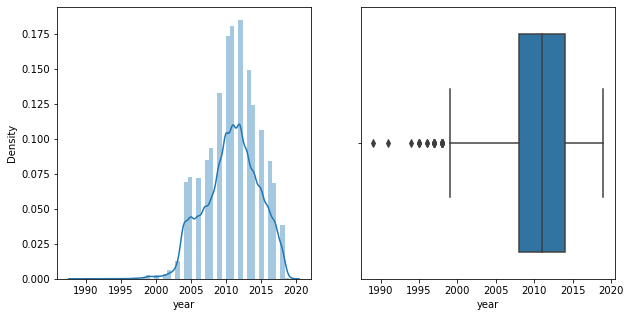

In [18]:
#outlier analysis from continous features
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sms.distplot(df1['year'])
plt.subplot(1,2,2)
sms.boxplot(df1['year'])
plt.show()

In [19]:
#finding the IQR - interquartile range
Q1 = df1['year'].quantile(0.25)
Q3 = df1['year'].quantile(0.75)
iqr = Q3 - Q1

In [20]:
filter = (df1['year'] >= Q1 - 1.5 * iqr) & (df1['year'] <= Q3 + 1.5 *iqr)
df2=df1.loc[filter] 

In [21]:
df2.shape

(26274, 28)

E:\phd\software\install\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\phd\software\install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\phd\software\install\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warn

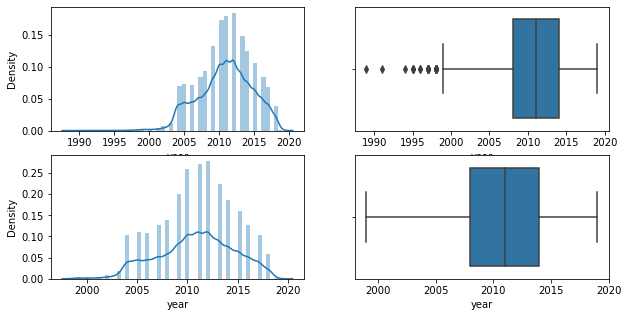

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sms.distplot(df1['year'])
plt.subplot(2,2,2)
sms.boxplot(df1['year'])
plt.subplot(2,2,3)
sms.distplot(df2['year'])
plt.subplot(2,2,4)
sms.boxplot(df2['year'])
plt.show()

E:\phd\software\install\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\phd\software\install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


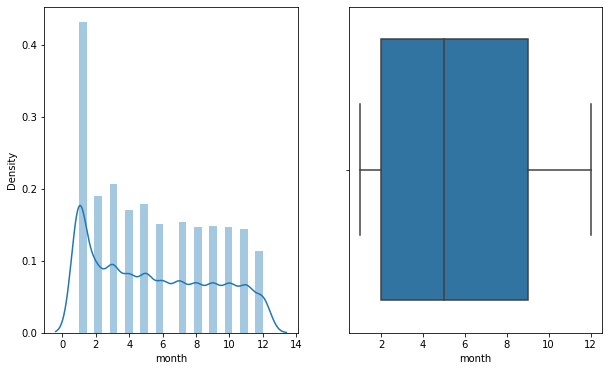

In [23]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sms.distplot(df1['month'])
plt.subplot(1,2,2)
sms.boxplot(df['month'])
plt.show()

E:\phd\software\install\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\phd\software\install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


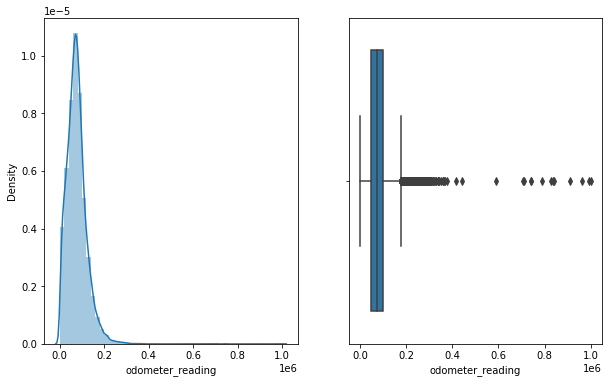

In [24]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sms.distplot(df2['odometer_reading'])
plt.subplot(1,2,2)
sms.boxplot(df2['odometer_reading'])
plt.show()

In [25]:
#finding the IQR - interquartile range
Q1o = df1['odometer_reading'].quantile(0.25)
Q3o = df1['odometer_reading'].quantile(0.75)
iqr = Q3o - Q1o

In [26]:
filter2 = (df2['odometer_reading'] >= Q1o - 1.5 * iqr) & (df2['odometer_reading'] <= Q3o + 1.5 *iqr)
df3 = df2.loc[filter2] 

In [27]:
df3.shape

(25557, 28)

E:\phd\software\install\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\phd\software\install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\phd\software\install\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warn

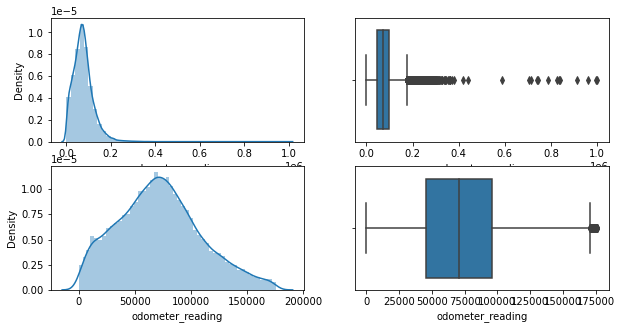

In [28]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sms.distplot(df2['odometer_reading'])
plt.subplot(2,2,2)
sms.boxplot(df2['odometer_reading'])
plt.subplot(2,2,3)
sms.distplot(df3['odometer_reading'])
plt.subplot(2,2,4)
sms.boxplot(df3['odometer_reading'])
plt.show()

In [29]:
df3.head()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,engineTransmission_coolant_value,engineTransmission_coolant_cc_value_0,engineTransmission_engineMounting_value,engineTransmission_engineMounting_cc_value_0,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_exhaustSmoke_value,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2/3/19 15:43,2008,8,No,Yes,No,Leaking,Dirty,Leakage from Tappet Cover,No,Repaired,No,Leaking,No,Excess Vibration,No,Alternator Brg Noise,Water Pump Brg Noise,No,No,Back Compression Exist,No,Spongy,Yes,Petrol + CNG,124600,3.0
1,aj_02,1/16/19 13:02,2007,5,Yes,Yes,No,Leaking,Dirty,Leakage from Tappet Cover,No,RPM fluctuating,No,Leaking,Yes,Yes,No,Timing Noise,Tappet Noise,No,Yes,NO Blow-by,Yes,Yes,Yes,Petrol + CNG,78108,4.0
2,aj_03,2/9/19 13:31,2012,5,Yes,Yes,No,Dirty,Yes,Yes,Yes,Yes,No,Dirty,No,Excess Vibration,No,Alternator Brg Noise,Engine Auxiliary Noise,No,Yes,Perm. Blow By on idle,No,Hard,Yes,Diesel,93348,3.5
3,aj_04,1/18/19 11:02,2013,1,Yes,Yes,No,Dirty,Yes,Yes,Yes,Yes,No,Dirty,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NO Blow-by,No,Hard,Yes,Petrol + CNG,48233,3.5
4,aj_05,1/27/19 12:12,2011,7,Yes,Yes,No,Leaking,Leakage from Tappet Cover,Yes,No,RPM fluctuating,Yes,Yes,No,Excess Vibration,No,Timing Noise,Tappet Noise,No,Yes,NO Blow-by,No,Spongy,Yes,Petrol + CNG,74368,4.0


In [30]:
df3.drop(['appointmentId', 'inspectionStartTime'], axis=1, inplace=True)

E:\phd\software\install\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
df3.head()

,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,engineTransmission_coolant_value,engineTransmission_coolant_cc_value_0,engineTransmission_engineMounting_value,engineTransmission_engineMounting_cc_value_0,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_exhaustSmoke_value,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission
0,2008,8,No,Yes,No,Leaking,Dirty,Leakage from Tappet Cover,No,Repaired,No,Leaking,No,Excess Vibration,No,Alternator Brg Noise,Water Pump Brg Noise,No,No,Back Compression Exist,No,Spongy,Yes,Petrol + CNG,124600,3.0
1,2007,5,Yes,Yes,No,Leaking,Dirty,Leakage from Tappet Cover,No,RPM fluctuating,No,Leaking,Yes,Yes,No,Timing Noise,Tappet Noise,No,Yes,NO Blow-by,Yes,Yes,Yes,Petrol + CNG,78108,4.0
2,2012,5,Yes,Yes,No,Dirty,Yes,Yes,Yes,Yes,No,Dirty,No,Excess Vibration,No,Alternator Brg Noise,Engine Auxiliary Noise,No,Yes,Perm. Blow By on idle,No,Hard,Yes,Diesel,93348,3.5
3,2013,1,Yes,Yes,No,Dirty,Yes,Yes,Yes,Yes,No,Dirty,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NO Blow-by,No,Hard,Yes,Petrol + CNG,48233,3.5
4,2011,7,Yes,Yes,No,Leaking,Leakage from Tappet Cover,Yes,No,RPM fluctuating,Yes,Yes,No,Excess Vibration,No,Timing Noise,Tappet Noise,No,Yes,NO Blow-by,No,Spongy,Yes,Petrol + CNG,74368,4.0


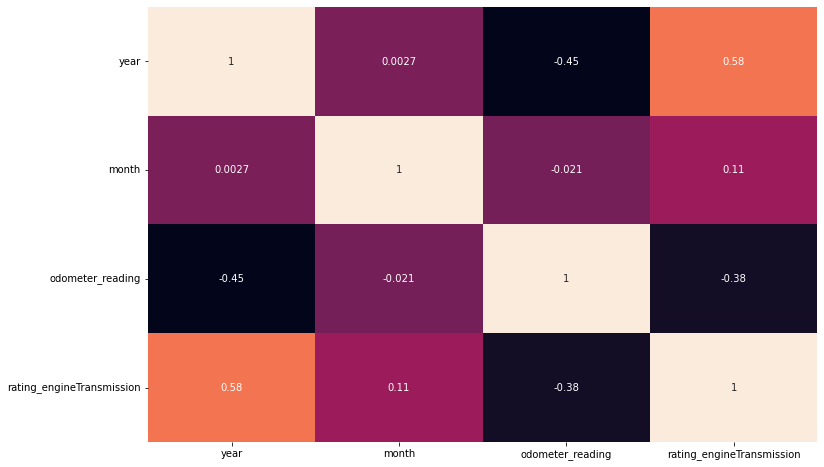

In [32]:
#finding the correlation between the dataset
corr_matrix = df3.corr()
plt.figure(figsize=(12, 8))
sms.heatmap(corr_matrix, annot=True, cbar=False)
plt.show()

In [33]:
correlation = df3.corr()
print(correlation['rating_engineTransmission'].sort_values(ascending=False))

rating_engineTransmission    1.000000
year                         0.579216
month                        0.112993
odometer_reading            -0.384254
Name: rating_engineTransmission, dtype: float64


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,plot_confusion_matrix


In [35]:
#encode categorical data using one hot encoding
df3_encoded = pd.get_dummies(df3, drop_first=True)

In [36]:
correlation = df3_encoded.corr()
print(correlation['rating_engineTransmission'].sort_values(ascending=False))

rating_engineTransmission                                                                         1.000000
year                                                                                              0.579216
engineTransmission_engine_value_Yes                                                               0.191436
engineTransmission_engine_cc_value_0_Yes                                                          0.191436
engineTransmission_exhaustSmoke_value_Yes                                                         0.191296
engineTransmission_clutch_value_Yes                                                               0.172681
engineTransmission_clutch_cc_value_0_Yes                                                          0.172681
engineTransmission_engineOil_cc_value_2_Yes                                                       0.167489
engineTransmission_engineOil_cc_value_1_Yes                                                       0.167077
engineTransmission_engineSound_cc_val

In [37]:
df3_encoded.head(3)

,year,month,odometer_reading,rating_engineTransmission,engineTransmission_battery_value_Yes,engineTransmission_engineoilLevelDipstick_value_Yes,engineTransmission_engineOil_Yes,engineTransmission_engineOil_cc_value_0_Leakage from Side cover,engineTransmission_engineOil_cc_value_0_Leakage from Sump/chamber,engineTransmission_engineOil_cc_value_0_Leakage from Tappet Cover,engineTransmission_engineOil_cc_value_0_Leakage from Turbo Charger,engineTransmission_engineOil_cc_value_0_Leaking,engineTransmission_engineOil_cc_value_0_Level Low,engineTransmission_engineOil_cc_value_0_Low Pressure warning light glowing,engineTransmission_engineOil_cc_value_0_Mixed with Coolant,engineTransmission_engineOil_cc_value_0_Yes,engineTransmission_engineOil_cc_value_1_Leakage from Side cover,engineTransmission_engineOil_cc_value_1_Leakage from Sump/chamber,engineTransmission_engineOil_cc_value_1_Leakage from Tappet Cover,engineTransmission_engineOil_cc_value_1_Leakage from Turbo Charger,engineTransmission_engineOil_cc_value_1_Leaking,engineTransmission_engineOil_cc_value_1_Low Pressure warning light glowing,engineTransmission_engineOil_cc_value_1_Mixed with Coolant,engineTransmission_engineOil_cc_value_1_Yes,engineTransmission_engineOil_cc_value_2_Leakage from Side cover,engineTransmission_engineOil_cc_value_2_Leakage from Sump/chamber,engineTransmission_engineOil_cc_value_2_Leakage from Tappet Cover,engineTransmission_engineOil_cc_value_2_Leakage from Turbo Charger,engineTransmission_engineOil_cc_value_2_Low Pressure warning light glowing,engineTransmission_engineOil_cc_value_2_Mixed with Coolant,engineTransmission_engineOil_cc_value_2_Yes,engineTransmission_engine_value_Yes,engineTransmission_engine_cc_value_0_Fuel Leakage From Injector,engineTransmission_engine_cc_value_0_MIL light glowing,engineTransmission_engine_cc_value_0_Misfiring,engineTransmission_engine_cc_value_0_Not converting to CNG,engineTransmission_engine_cc_value_0_Over heating,engineTransmission_engine_cc_value_0_RPM fluctuating,engineTransmission_engine_cc_value_0_RPM not increasing,engineTransmission_engine_cc_value_0_Repaired,engineTransmission_engine_cc_value_0_Seized,engineTransmission_engine_cc_value_0_Sump Damaged,engineTransmission_engine_cc_value_0_Turbo charger not working,engineTransmission_engine_cc_value_0_Yes,engineTransmission_coolant_value_Yes,engineTransmission_coolant_cc_value_0_Leaking,engineTransmission_coolant_cc_value_0_Mixed with Engine Oil,engineTransmission_coolant_cc_value_0_Radiator Damaged,engineTransmission_coolant_cc_value_0_Yes,engineTransmission_engineMounting_value_Yes,engineTransmission_engineMounting_cc_value_0_Excess Vibration,engineTransmission_engineMounting_cc_value_0_Loose,engineTransmission_engineMounting_cc_value_0_Yes,engineTransmission_engineSound_value_Yes,engineTransmission_engineSound_cc_value_0_Engine Auxiliary Noise,engineTransmission_engineSound_cc_value_0_Injector Noise,engineTransmission_engineSound_cc_value_0_Tappet Noise,engineTransmission_engineSound_cc_value_0_Timing Noise,engineTransmission_engineSound_cc_value_0_Water Pump Brg Noise,engineTransmission_engineSound_cc_value_0_Whistling Noise-Turbo,engineTransmission_engineSound_cc_value_0_Yes,engineTransmission_engineSound_cc_value_1_Engine Auxiliary Noise,engineTransmission_engineSound_cc_value_1_Injector Noise,engineTransmission_engineSound_cc_value_1_Tappet Noise,engineTransmission_engineSound_cc_value_1_Timing Noise,engineTransmission_engineSound_cc_value_1_Water Pump Brg Noise,engineTransmission_engineSound_cc_value_1_Yes,engineTransmission_exhaustSmoke_value_Yes,engineTransmission_engineBlowByBackCompression_value_Yes,engineTransmission_engineBlowByBackCompression_cc_value_0_NO Blow-by,engineTransmission_engineBlowByBackCompression_cc_value_0_Oil spillage on Idle,engineTransmission_engineBlowByBackCompression_cc_value_0_Perm. Blow By on idle,engineTransmission_engineBlowByBackCompression_cc_value_0_Perm. blow by & oil spillage on idle,engineTransmission_clutch_value_Yes

In [38]:
#move the target column to last position
mid = df3_encoded['rating_engineTransmission']
df3_encoded.drop(labels=['rating_engineTransmission'], axis=1, inplace = True)
df3_encoded.insert(86, 'rating_engineTransmission', mid)
df3_encoded.head()

,year,month,odometer_reading,engineTransmission_battery_value_Yes,engineTransmission_engineoilLevelDipstick_value_Yes,engineTransmission_engineOil_Yes,engineTransmission_engineOil_cc_value_0_Leakage from Side cover,engineTransmission_engineOil_cc_value_0_Leakage from Sump/chamber,engineTransmission_engineOil_cc_value_0_Leakage from Tappet Cover,engineTransmission_engineOil_cc_value_0_Leakage from Turbo Charger,engineTransmission_engineOil_cc_value_0_Leaking,engineTransmission_engineOil_cc_value_0_Level Low,engineTransmission_engineOil_cc_value_0_Low Pressure warning light glowing,engineTransmission_engineOil_cc_value_0_Mixed with Coolant,engineTransmission_engineOil_cc_value_0_Yes,engineTransmission_engineOil_cc_value_1_Leakage from Side cover,engineTransmission_engineOil_cc_value_1_Leakage from Sump/chamber,engineTransmission_engineOil_cc_value_1_Leakage from Tappet Cover,engineTransmission_engineOil_cc_value_1_Leakage from Turbo Charger,engineTransmission_engineOil_cc_value_1_Leaking,engineTransmission_engineOil_cc_value_1_Low Pressure warning light glowing,engineTransmission_engineOil_cc_value_1_Mixed with Coolant,engineTransmission_engineOil_cc_value_1_Yes,engineTransmission_engineOil_cc_value_2_Leakage from Side cover,engineTransmission_engineOil_cc_value_2_Leakage from Sump/chamber,engineTransmission_engineOil_cc_value_2_Leakage from Tappet Cover,engineTransmission_engineOil_cc_value_2_Leakage from Turbo Charger,engineTransmission_engineOil_cc_value_2_Low Pressure warning light glowing,engineTransmission_engineOil_cc_value_2_Mixed with Coolant,engineTransmission_engineOil_cc_value_2_Yes,engineTransmission_engine_value_Yes,engineTransmission_engine_cc_value_0_Fuel Leakage From Injector,engineTransmission_engine_cc_value_0_MIL light glowing,engineTransmission_engine_cc_value_0_Misfiring,engineTransmission_engine_cc_value_0_Not converting to CNG,engineTransmission_engine_cc_value_0_Over heating,engineTransmission_engine_cc_value_0_RPM fluctuating,engineTransmission_engine_cc_value_0_RPM not increasing,engineTransmission_engine_cc_value_0_Repaired,engineTransmission_engine_cc_value_0_Seized,engineTransmission_engine_cc_value_0_Sump Damaged,engineTransmission_engine_cc_value_0_Turbo charger not working,engineTransmission_engine_cc_value_0_Yes,engineTransmission_coolant_value_Yes,engineTransmission_coolant_cc_value_0_Leaking,engineTransmission_coolant_cc_value_0_Mixed with Engine Oil,engineTransmission_coolant_cc_value_0_Radiator Damaged,engineTransmission_coolant_cc_value_0_Yes,engineTransmission_engineMounting_value_Yes,engineTransmission_engineMounting_cc_value_0_Excess Vibration,engineTransmission_engineMounting_cc_value_0_Loose,engineTransmission_engineMounting_cc_value_0_Yes,engineTransmission_engineSound_value_Yes,engineTransmission_engineSound_cc_value_0_Engine Auxiliary Noise,engineTransmission_engineSound_cc_value_0_Injector Noise,engineTransmission_engineSound_cc_value_0_Tappet Noise,engineTransmission_engineSound_cc_value_0_Timing Noise,engineTransmission_engineSound_cc_value_0_Water Pump Brg Noise,engineTransmission_engineSound_cc_value_0_Whistling Noise-Turbo,engineTransmission_engineSound_cc_value_0_Yes,engineTransmission_engineSound_cc_value_1_Engine Auxiliary Noise,engineTransmission_engineSound_cc_value_1_Injector Noise,engineTransmission_engineSound_cc_value_1_Tappet Noise,engineTransmission_engineSound_cc_value_1_Timing Noise,engineTransmission_engineSound_cc_value_1_Water Pump Brg Noise,engineTransmission_engineSound_cc_value_1_Yes,engineTransmission_exhaustSmoke_value_Yes,engineTransmission_engineBlowByBackCompression_value_Yes,engineTransmission_engineBlowByBackCompression_cc_value_0_NO Blow-by,engineTransmission_engineBlowByBackCompression_cc_value_0_Oil spillage on Idle,engineTransmission_engineBlowByBackCompression_cc_value_0_Perm. Blow By on idle,engineTransmission_engineBlowByBackCompression_cc_value_0_Perm. blow by & oil spillage on idle,engineTransmission_clutch_value_Yes,engineTransmission_clutch

In [39]:
#split dependent and Independent variables
X1 = df3_encoded.iloc[:,:-1]
y1 = df3_encoded.iloc[:,-1] #traget variable

In [40]:
X1.head(3)

,year,month,odometer_reading,engineTransmission_battery_value_Yes,engineTransmission_engineoilLevelDipstick_value_Yes,engineTransmission_engineOil_Yes,engineTransmission_engineOil_cc_value_0_Leakage from Side cover,engineTransmission_engineOil_cc_value_0_Leakage from Sump/chamber,engineTransmission_engineOil_cc_value_0_Leakage from Tappet Cover,engineTransmission_engineOil_cc_value_0_Leakage from Turbo Charger,engineTransmission_engineOil_cc_value_0_Leaking,engineTransmission_engineOil_cc_value_0_Level Low,engineTransmission_engineOil_cc_value_0_Low Pressure warning light glowing,engineTransmission_engineOil_cc_value_0_Mixed with Coolant,engineTransmission_engineOil_cc_value_0_Yes,engineTransmission_engineOil_cc_value_1_Leakage from Side cover,engineTransmission_engineOil_cc_value_1_Leakage from Sump/chamber,engineTransmission_engineOil_cc_value_1_Leakage from Tappet Cover,engineTransmission_engineOil_cc_value_1_Leakage from Turbo Charger,engineTransmission_engineOil_cc_value_1_Leaking,engineTransmission_engineOil_cc_value_1_Low Pressure warning light glowing,engineTransmission_engineOil_cc_value_1_Mixed with Coolant,engineTransmission_engineOil_cc_value_1_Yes,engineTransmission_engineOil_cc_value_2_Leakage from Side cover,engineTransmission_engineOil_cc_value_2_Leakage from Sump/chamber,engineTransmission_engineOil_cc_value_2_Leakage from Tappet Cover,engineTransmission_engineOil_cc_value_2_Leakage from Turbo Charger,engineTransmission_engineOil_cc_value_2_Low Pressure warning light glowing,engineTransmission_engineOil_cc_value_2_Mixed with Coolant,engineTransmission_engineOil_cc_value_2_Yes,engineTransmission_engine_value_Yes,engineTransmission_engine_cc_value_0_Fuel Leakage From Injector,engineTransmission_engine_cc_value_0_MIL light glowing,engineTransmission_engine_cc_value_0_Misfiring,engineTransmission_engine_cc_value_0_Not converting to CNG,engineTransmission_engine_cc_value_0_Over heating,engineTransmission_engine_cc_value_0_RPM fluctuating,engineTransmission_engine_cc_value_0_RPM not increasing,engineTransmission_engine_cc_value_0_Repaired,engineTransmission_engine_cc_value_0_Seized,engineTransmission_engine_cc_value_0_Sump Damaged,engineTransmission_engine_cc_value_0_Turbo charger not working,engineTransmission_engine_cc_value_0_Yes,engineTransmission_coolant_value_Yes,engineTransmission_coolant_cc_value_0_Leaking,engineTransmission_coolant_cc_value_0_Mixed with Engine Oil,engineTransmission_coolant_cc_value_0_Radiator Damaged,engineTransmission_coolant_cc_value_0_Yes,engineTransmission_engineMounting_value_Yes,engineTransmission_engineMounting_cc_value_0_Excess Vibration,engineTransmission_engineMounting_cc_value_0_Loose,engineTransmission_engineMounting_cc_value_0_Yes,engineTransmission_engineSound_value_Yes,engineTransmission_engineSound_cc_value_0_Engine Auxiliary Noise,engineTransmission_engineSound_cc_value_0_Injector Noise,engineTransmission_engineSound_cc_value_0_Tappet Noise,engineTransmission_engineSound_cc_value_0_Timing Noise,engineTransmission_engineSound_cc_value_0_Water Pump Brg Noise,engineTransmission_engineSound_cc_value_0_Whistling Noise-Turbo,engineTransmission_engineSound_cc_value_0_Yes,engineTransmission_engineSound_cc_value_1_Engine Auxiliary Noise,engineTransmission_engineSound_cc_value_1_Injector Noise,engineTransmission_engineSound_cc_value_1_Tappet Noise,engineTransmission_engineSound_cc_value_1_Timing Noise,engineTransmission_engineSound_cc_value_1_Water Pump Brg Noise,engineTransmission_engineSound_cc_value_1_Yes,engineTransmission_exhaustSmoke_value_Yes,engineTransmission_engineBlowByBackCompression_value_Yes,engineTransmission_engineBlowByBackCompression_cc_value_0_NO Blow-by,engineTransmission_engineBlowByBackCompression_cc_value_0_Oil spillage on Idle,engineTransmission_engineBlowByBackCompression_cc_value_0_Perm. Blow By on idle,engineTransmission_engineBlowByBackCompression_cc_value_0_Perm. blow by & oil spillage on idle,engineTransmission_clutch_value_Yes,engineTransmission_clutch

In [41]:
y1.head(3)

0    3.0
1    4.0
2    3.5
Name: rating_engineTransmission, dtype: float64

In [42]:
#scaling the dataset using standardScaler
scaler = preprocessing.StandardScaler()
X_sc = pd.DataFrame(scaler.fit_transform(X1), columns=X1.columns)
y_sc = y1

In [43]:
X_sc.shape

(25557, 86)

In [44]:
y_sc.shape

(25557,)

In [45]:
# Split the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X_sc, y_sc, test_size=0.2, random_state=42)

# LINEAR REGRESSION

Score on train data: 0.4148471944028639
Score on trest data: 0.417162880334623
Predicted rating of engineTransmission: [3.46493188 3.52168165 4.65062335 ... 3.06449165 3.46075907 2.84878877]


E:\phd\software\install\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


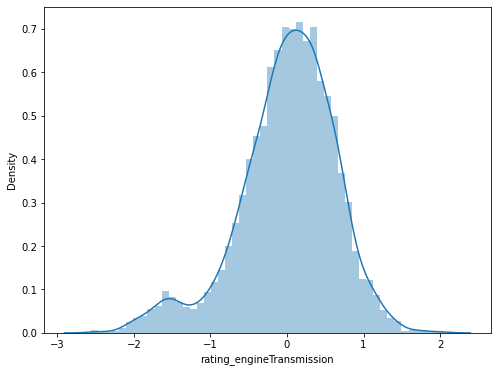

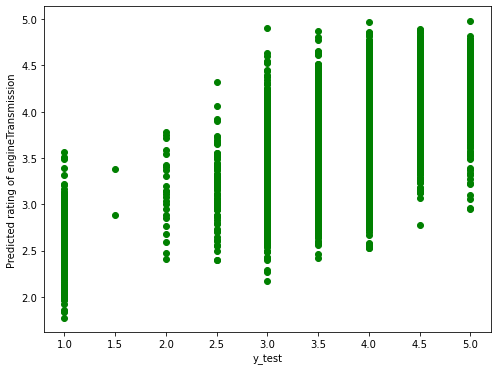

MAE: 0.48668570649308973
MSE: 0.4056761159965089
RMSE: 0.636927088446165


In [46]:
#Linear regression
reg_mod = LinearRegression()
# fit the model
reg_mod.fit(X_train, y_train)
reg_train_score=reg_mod.score(X_train,y_train)
reg_test_score=reg_mod.score(X_test,y_test)
print("Score on train data:",reg_train_score)
print("Score on trest data:",reg_test_score)

# Linear regression model evaluation
pred = reg_mod.predict(X_test)
print("Predicted rating of engineTransmission:",pred)

# checking difference between labled y and predicted y
plt.figure(figsize=(8,6))
sms.distplot(y_test-pred)
plt.show()
#checking predicted y and labeled y using a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color='green')
plt.xlabel('y_test')
plt.ylabel('Predicted rating of engineTransmission')
plt.show()
#print(pred.shape)
#print(y_test.shape)
#print(y_test)
MAE_lr = metrics.mean_absolute_error(y_test,pred)
print('MAE:',MAE_lr )
MSE_lr = metrics.mean_squared_error(y_test, pred)
print('MSE:', MSE_lr )
RMSE_lr = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('RMSE:',RMSE_lr )


In [47]:
#hypertuning using grid search in Linear regression
param = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
tuned_model = GridSearchCV(reg_mod,param,cv=None)
tuned_model.fit(X_train,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [48]:
# best hyperparameters 
tuned_model.best_params_

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

In [49]:
tuned_hyper_model_lr= reg_mod
tuned_hyper_model_lr.fit(X_train,y_train)
print("Score on train data:",tuned_hyper_model_lr.score(X_train,y_train))
print("Score on test data:",tuned_hyper_model_lr.score(X_test,y_test))
tuned_predi=tuned_hyper_model_lr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test,tuned_predi))
print('MSE:', metrics.mean_squared_error(y_test, tuned_predi))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_predi)))

Score on train data: 0.4148471944028639
Score on test data: 0.417162880334623
MAE: 0.48668570649308973
MSE: 0.4056761159965089
RMSE: 0.636927088446165


# DECISION TREE

Score on train data: 1.0
Score on test data: 0.4208351089392196
Predicted rating of engineTransmission: [3.5 4.  4.5 ... 1.  3.5 3. ]


E:\phd\software\install\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


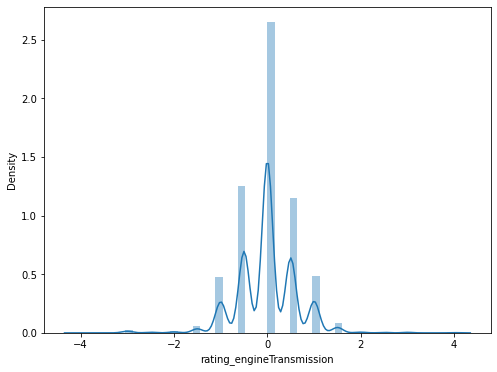

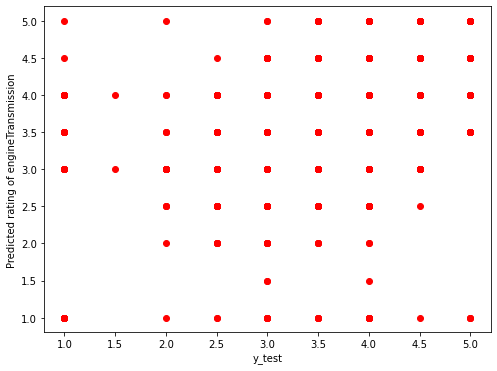

MAE: 0.41774256651017216
MSE: 0.4031201095461659
RMSE: 0.6349174037197011


In [50]:
#Decision Tree
reg_decision_model=DecisionTreeRegressor()

# fit the model
reg_decision_model.fit(X_train,y_train)
dt_train_score = reg_decision_model.score(X_train,y_train)
dt_test_score = reg_decision_model.score(X_test,y_test)
print("Score on train data:",dt_train_score)
print("Score on test data:",dt_test_score)

# Decision tree model evaluation
prediction=reg_decision_model.predict(X_test)
print("Predicted rating of engineTransmission:",prediction)
# checking difference between labled y and predicted y
plt.figure(figsize=(8,6))
sms.distplot(y_test-prediction)
plt.show()
#checking predicted y and labeled y using a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_test,prediction,color='red')
plt.xlabel('y_test')
plt.ylabel('Predicted rating of engineTransmission')
plt.show()
MAE_dt = metrics.mean_absolute_error(y_test,prediction)
print('MAE:', MAE_dt)
MSE_dt = metrics.mean_squared_error(y_test, prediction)
print('MSE:', MSE_dt)
RMSE_dt = np.sqrt(metrics.mean_squared_error(y_test, prediction))
print('RMSE:',RMSE_dt )

In [51]:
#hypertuning using grid search decision tree
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7],
           "min_samples_leaf":[1,2,3,4],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30]}
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
tuning_model.fit(X_train,y_train)

Fitting 3 folds for each of 2048 candidates, totalling 6144 fits
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.585 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.539 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.545 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.647 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.573 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [52]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [53]:
tuned_hyper_model_dt= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=None,min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter='best')

In [54]:
tuned_hyper_model_dt.fit(X_train,y_train)
tuned_pred=tuned_hyper_model_dt.predict(X_test)
print("Score on train data:",tuned_hyper_model_dt.score(X_train,y_train))
print("Score on test data:",tuned_hyper_model_dt.score(X_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

Score on train data: 0.34829906212916006
Score on test data: 0.34800498222506215
MAE: 0.4935594189232916
MSE: 0.4538125619244493
RMSE: 0.6736561154806281


# KNN

Score on train data: 0.7530616836587025
Score on test data: 0.5949232363053627
Predicted rating of engineTransmission: [3.3 3.9 3.8 ... 3.1 3.7 3.2]


E:\phd\software\install\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


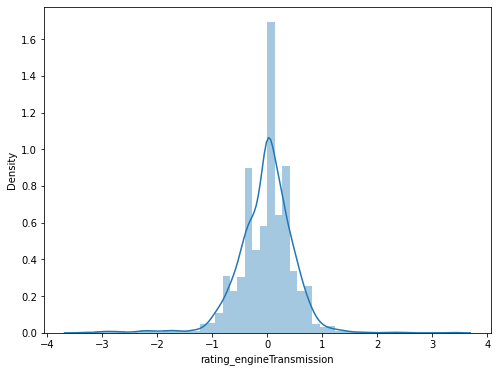

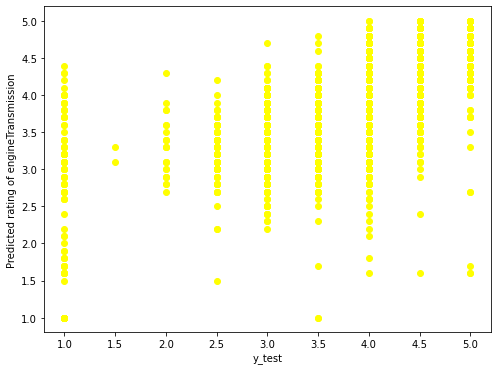

MAE: 0.3654538341158059
MSE: 0.28194835680751174
RMSE: 0.5309880947888679


In [61]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train) 

# Knn model evaluation
predicted=knn.predict(X_test)
knn_train_score = knn.score(X_train,y_train)
knn_test_score = knn.score(X_test,y_test)
print("Score on train data:",knn_train_score)
print("Score on test data:",knn_test_score)
print("Predicted rating of engineTransmission:",predicted)

# checking difference between labled y and predicted y
plt.figure(figsize=(8,6))
sms.distplot(y_test-predicted)
plt.show()
#checking predicted y and labeled y using a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_test,predicted,color='yellow')
plt.xlabel('y_test')
plt.ylabel('Predicted rating of engineTransmission')
plt.show()
MAE_knn =  metrics.mean_absolute_error(y_test,predicted)
print('MAE:', MAE_knn)
MSE_knn = metrics.mean_squared_error(y_test, predicted)
print('MSE:', MSE_knn)
RMSE_knn = np.sqrt(metrics.mean_squared_error(y_test, predicted))
print('RMSE:', RMSE_knn)



In [56]:
#hypertuning using grid search in KNN
k_range = list(range(1, 10))
parameter = dict(n_neighbors=k_range)
tune_model = GridSearchCV(knn, param_grid=parameter, cv=10, scoring='accuracy',verbose=1)
tune_model=tune_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


E:\phd\software\install\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\phd\software\install\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\phd\software\install\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\phd\software\install\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\phd\software\install\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\phd\software\install\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, y_pred

In [57]:
print(tune_model.best_params_)

{'n_neighbors': 1}


In [58]:
tuned_hyper_model_knn= KNeighborsRegressor(n_neighbors=1)
tuned_hyper_model_knn.fit(X_train,y_train)
print("Score on train data:",tuned_hyper_model_knn.score(X_train,y_train))
print("Score on test data:",tuned_hyper_model_knn.score(X_test,y_test))
tuned_pred=tuned_hyper_model_knn.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

Score on train data: 1.0
Score on test data: 0.37361943421001365
MAE: 0.4175469483568075
MSE: 0.4359839593114241
RMSE: 0.6602908141958542


In [62]:
# Results
results = {'Train score' : [reg_train_score,dt_train_score,knn_test_score], 
                     'Test score' : [reg_test_score,dt_test_score,knn_train_score],
          'MAE':[MAE_lr,MAE_dt,MAE_knn],
          'MSE':[MSE_lr,MSE_dt,MSE_knn],
          'RMSE':[RMSE_lr,RMSE_dt,RMSE_knn]}
df_r = pd.DataFrame(results, index=['Linear regression','Descison Tree','KNN'])
df_r.head()


,Train score,Test score,MAE,MSE,RMSE
Linear regression,0.414847,0.417163,0.486686,0.405676,0.636927
Descison Tree,1.000000,0.420835,0.417743,0.403120,0.634917
KNN,0.594923,0.753062,0.365454,0.281948,0.530988
